In [9]:
import numpy as np
from numpy import linalg as LA
from sympy import *
from matplotlib import pyplot as plt

In [10]:
# Potential function
def u(m, w, x):
 return 0.5 * m * w**2 * x**2

# Initial gaussian function
def v(c, x):
 return exp(c * x**2)

# Normalization function
def norml(func, a, b):
 return integrate(func, (x, a, b))

# Psi1 (aka gaussian with norm. const)
def psi(A, c, x):
 return A * v(c, x)

# Hamiltonian operator function 
def H(func, m, h, w, x):
 deriv = diff(func, x, 2)
 return - (deriv * h**2) / (2 * m) + u(m, w, x) * func

# Step 2 (w_prime -> integrand to find alpha)
def w_prime(func, m, h, w, x):
 H_psi = H(func, m, h, w, x)
 return func * H_psi

def w1(func, m, h, w, x, alpha):
 return H(func, m, h, w, x) * func - alpha * func

# Function to tridiagonalize
def tridiag(a, b, c, k1=-1, k2=0, k3=1):
  return np.diag(a, k1) + np.diag(b, k2) + np.diag(c, k3)

In [11]:
# Lists
y, z = [], []
# Iteration num
n = 5
# Physical constants
x = symbols('x')
m = 1
h = 1
w = 1
c = - (m * w) / (2 * h)
# Normalization constant
A = sqrt(1 / norml(v(c, x)**2, -oo, oo))

In [12]:
# Finding alpha1
alpha = N(norml(w_prime(psi(A, c, x), m, h, w, x), -oo, oo), 3)
z.append(alpha)

In [13]:
beta1 = N(sqrt(norml(w1(psi(A, c, x), m, h, w, x, alpha)**2, -oo, oo)), 3)
y.append(beta1)

In [14]:
# Iterative part of lanczos algorithm (n-1 iterations)
j = n - 1
for i in range(j):
  psi1 = psi(A, c, x) / y[i - 1]
  alpha_n = N(norml(w_prime(psi(A, c, x), m, h, w, x), -oo, oo), 3)
  z.append(alpha_n)
  beta_n = N(sqrt(norml(w1(psi(A, c, x), m, h, w, x, alpha)**2, -oo, oo)), 3)
  # Reset
  if i < (j-1):
     y.append(beta_n)
  psi_2 = psi1 / beta_n
  psi1 = psi_2

In [15]:
T = tridiag(y, z, y)
T = T.astype('float64')
print(f'Tridiagonalization of A:\n{T}\n')
# Finding the eigenvalues w and eigenvectors v of the tri-diagonal matrix
s, t = LA.eig(T)
print(f'Associated eigenvalues:\n{s}\n')
print(f'Associated eigenvectors:\n{t}\n')

Tridiagonalization of A:
[[0.5        0.20758057 0.         0.         0.        ]
 [0.20758057 0.5        0.20758057 0.         0.        ]
 [0.         0.20758057 0.5        0.20758057 0.        ]
 [0.         0.         0.20758057 0.5        0.20758057]
 [0.         0.         0.         0.20758057 0.5       ]]

Associated eigenvalues:
[0.85954009 0.70758057 0.5        0.14045991 0.29241943]

Associated eigenvectors:
[[ 2.88675135e-01 -5.00000000e-01  5.77350269e-01 -2.88675135e-01
  -5.00000000e-01]
 [ 5.00000000e-01 -5.00000000e-01  6.98292345e-16  5.00000000e-01
   5.00000000e-01]
 [ 5.77350269e-01 -2.20295104e-15 -5.77350269e-01 -5.77350269e-01
   4.32802501e-16]
 [ 5.00000000e-01  5.00000000e-01 -1.68829397e-16  5.00000000e-01
  -5.00000000e-01]
 [ 2.88675135e-01  5.00000000e-01  5.77350269e-01 -2.88675135e-01
   5.00000000e-01]]



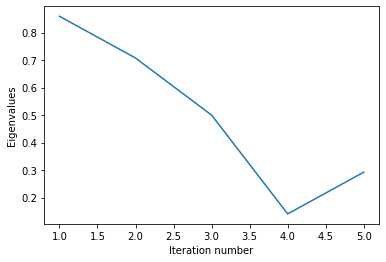

In [19]:
plot_y = np.asarray(s)
plot_x = np.asarray(range(1, n + 1))
plt.plot(plot_x, plot_y)
plt.xlabel('Iteration number')
plt.ylabel('Eigenvalues')
plt.show()